<h1>Лабораторна робота №5<br>З Обробки та аналізу БМД</h1>
<h2 >Виконав:<br>Яцина Денис</h2>
<h6>Критерій Пірсона для порівняння декількох груп за розподіленням ознаки</h6>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [36]:
data = pd.read_csv('netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [37]:
col_names = ["United States","United Kingdom"]
df = pd.DataFrame(columns=col_names)
United_States = 0
United_States_1 = 0
United_States_2 = 0
United_States_3 = 0
United_Kingdom = 0
United_Kingdom_1 = 0
United_Kingdom_2 = 0
United_Kingdom_3 = 0

n = data.shape[0]

for i in range(n): 
    if "United States" == data["country"][i]:
        if (data['release_year'][i] >= 2018):
            United_States += 1
        elif ((data['release_year'][i] >= 2015) & (data['release_year'][i] < 2018)):
            United_States_1 += 1
        elif ((data['release_year'][i] >= 2011) & (data['release_year'][i] < 2015)):
            United_States_2 += 1
        else:
            United_States_3 += 1   
    elif ("United Kingdom" == data["country"][i]):
        if (data['release_year'][i] >= 2018):
            United_Kingdom += 1
        elif ((data['release_year'][i] >= 2015) & (data['release_year'][i] < 2018)):
            United_Kingdom_1 += 1
        elif ((data['release_year'][i] >= 2011) & (data['release_year'][i] < 2015)):
            United_Kingdom_2 += 1
        else:
            United_Kingdom_3 += 1
            
df = pd.DataFrame({"United States": pd.Series([United_States,United_States_1,United_States_2,United_States_3], index = ["After 2018","Beetwen 2015-2018","Beetwen 2011-2015","Before 2011"]),
                  "United Kingdom": pd.Series([United_Kingdom,United_Kingdom_1,United_Kingdom_2,United_Kingdom_3], index = ["After 2018","Beetwen 2015-2018","Beetwen 2011-2015","Before 2011"])})
new_df = copy.deepcopy(df)
df

,United States,United Kingdom
After 2018,689,91
Beetwen 2015-2018,707,167
Beetwen 2011-2015,219,53
Before 2011,417,37


Побудувати графік, що відображає розподіл ознак в групах.

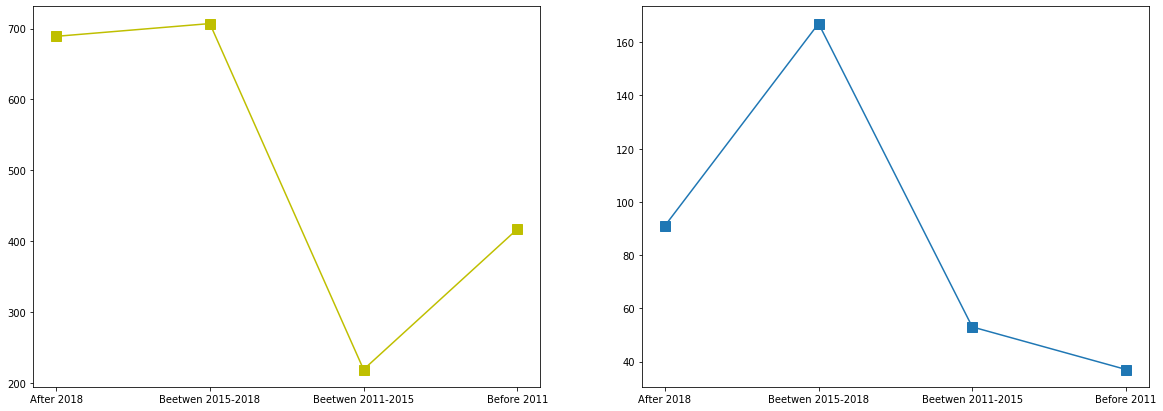

In [38]:
plt.subplots(1,2,figsize = (20,7))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['United States'], marker = 's', markersize = 10, color = 'y')

plt.subplot(1, 2, 2)
plt.plot(df.index, df['United Kingdom'], marker = 's', markersize = 10)

Написати функцію, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.


In [39]:
def Pirson(new_data, significant_level):
    N = new_data.shape[0]
    if(sum(new_data["United States"]) != sum(new_data["United Kingdom"])):
        new_data["United States"] = [new_data["United States"][i] * 100 / sum(new_data["United States"]) for i in range(N)]
        new_data["United Kingdom"] = [new_data["United Kingdom"][i] * 100 / sum(new_data["United Kingdom"]) for i in range(N)]
    else:
        new_data["(𝑛𝑖−𝑛̀𝑖)^2"] = [(new_data["United States"][i] - new_data["United Kingdom"][i])**2 for i in range(N)]
        new_data["(𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖"] = [(new_data["(𝑛𝑖−𝑛̀𝑖)^2"][i] / new_data["United Kingdom"][i]) for i in range(N)]
        x = sum(new_data["(𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖"])
        r = N - 1
        print("Таблиця спряженості:")
        print(new_data)
        print("\nχ^2 = " + str(x))
        print("Кількість ступенів свободи: " + str(r))
        table = pd.read_excel(r'C:\Users\User\Таблиця критичних значень для критерію Пірсона.xlsx', encoding='utf-8')
        a = table.loc[r, "Рівень значимості" if(significant_level ==  0.01) else "Unnamed: 2"]
        print("χ^2 критичне = " + str(a))
        if(x > a):
            print("Розбіжність між розподіленнями статистично значима на даному рівні значимості")
            res = 'Yes'
        else:
            print("Розбіжність між розподіленнями відсутня або не суттєва на даному рівні значимості")
            res = 'No'
        return res

Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості

In [40]:
Pirson(df,0.01)

In [41]:
Pirson(df,0.05)

Таблиця спряженості:
                   United States  United Kingdom  (𝑛𝑖−𝑛̀𝑖)^2  (𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖
After 2018             33.907480       26.149425   60.187418        2.301673
Beetwen 2015-2018      34.793307       47.988506  174.113268        3.628229
Beetwen 2011-2015      10.777559       15.229885   19.823207        1.301599
Before 2011            20.521654       10.632184   97.801610        9.198638

χ^2 = 16.4301383765317
Кількість ступенів свободи: 3
χ^2 критичне = 7.8
Розбіжність між розподіленнями статистично значима на даному рівні значимості


'Yes'

In [42]:
new_df.insert(1, "United States in %", df["United States"])
new_df.insert(3, "United Kingdom in %", df["United Kingdom"])
new_df

,United States,United States in %,United Kingdom,United Kingdom in %
After 2018,689,33.907480,91,26.149425
Beetwen 2015-2018,707,34.793307,167,47.988506
Beetwen 2011-2015,219,10.777559,53,15.229885
Before 2011,417,20.521654,37,10.632184


<h6>Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).</h6>

In [43]:
first = Pirson(df,0.01)
second = Pirson(df,0.05)
result = pd.DataFrame([first,second], columns = ["Статистична розбіжність"], index = ['0.01','0.05'])
result

Таблиця спряженості:
                   United States  United Kingdom  (𝑛𝑖−𝑛̀𝑖)^2  (𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖
After 2018             33.907480       26.149425   60.187418        2.301673
Beetwen 2015-2018      34.793307       47.988506  174.113268        3.628229
Beetwen 2011-2015      10.777559       15.229885   19.823207        1.301599
Before 2011            20.521654       10.632184   97.801610        9.198638

χ^2 = 16.4301383765317
Кількість ступенів свободи: 3
χ^2 критичне = 11.3
Розбіжність між розподіленнями статистично значима на даному рівні значимості
Таблиця спряженості:
                   United States  United Kingdom  (𝑛𝑖−𝑛̀𝑖)^2  (𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖
After 2018             33.907480       26.149425   60.187418        2.301673
Beetwen 2015-2018      34.793307       47.988506  174.113268        3.628229
Beetwen 2011-2015      10.777559       15.229885   19.823207        1.301599
Before 2011            20.521654       10.632184   97.801610        9.198638

χ^2 = 16.4301383765317
Кількість ст

,Статистична розбіжність
0.01,Yes
0.05,Yes
